In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('BankCustomers.csv')
X = train.iloc[:, 3:13]
y = train.iloc[:, 13]
# convert categorical feature into dummy variables

states=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

#concatenate the remaining dummies columns
X=pd.concat([X,states,gender],axis=1)

#drop the columns as it is no longer required

X=X.drop(['Geography','Gender'],axis=1)

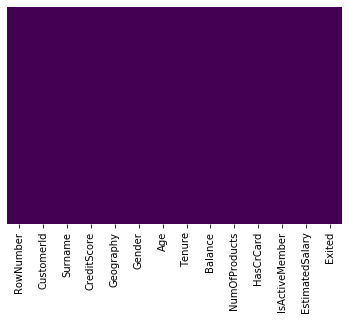

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")
#this is for False heatmap I dont have it

In [6]:
sns.set_style("whitegrid")


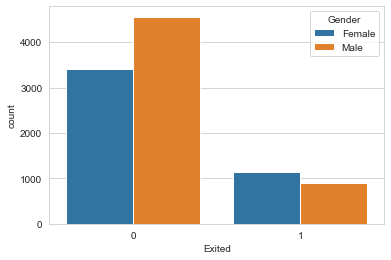

In [7]:
sns.countplot(x='Exited',hue="Gender", data=train)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
import cufflinks as cf
cf.go_offline()

In [10]:
train['Age'].iplot(kind='hist',bins=10)

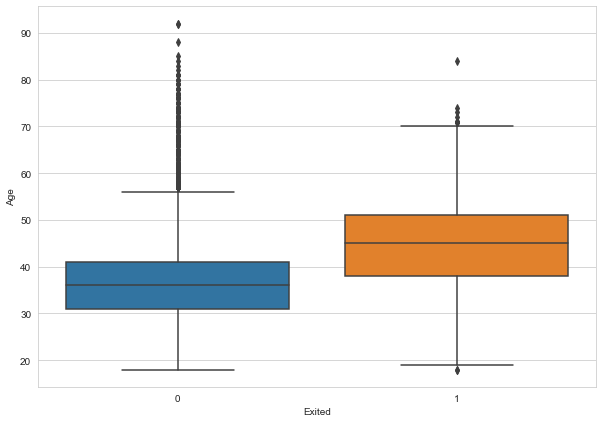

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Exited',y="Age",data=train)

In [70]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [71]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)
print(accuracy)

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      2379
           1       0.33      0.06      0.11       621

    accuracy                           0.78      3000
   macro avg       0.56      0.51      0.49      3000
weighted avg       0.70      0.78      0.72      3000

0.7796666666666666
